# Top tech stocks analysis from US market to decide best stock for your investment based on your risk factor

Let's try to dig in why we need such type of analysis, Everything start with investment and its return with some safety and security. Its really important to do filter the stocks on some parameter's when we are formulating our stock portfolio. Here we are analyzing top 4 tech companies from the United States to see which stock is more suitable for portfolio based on risk factor

## 1. Importing packages and datasets

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas_datareader.data import DataReader
from datetime import datetime

## 2. Importing datasets from Yahoo reader

In [2]:
# The tech stocks we will use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:   
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

## 3. Display data characteristics

In [3]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2022-04-12,3101.979980,3007.659912,3073.850098,3015.750000,2758900.0,3015.750000,AMAZON
2022-04-13,3120.500000,2992.000000,3000.370117,3110.820068,2669500.0,3110.820068,AMAZON
2022-04-14,3117.939941,3029.439941,3107.800049,3034.129883,2575200.0,3034.129883,AMAZON
2022-04-18,3080.790039,3005.010010,3030.469971,3055.699951,2325700.0,3055.699951,AMAZON
2022-04-19,3172.979980,3031.010010,3040.590088,3162.310059,2746300.0,3162.310059,AMAZON
2022-04-20,3152.050049,3072.070068,3152.050049,3079.959961,2981500.0,3079.959961,AMAZON
2022-04-21,3134.760010,2951.790039,3094.280029,2965.919922,3198500.0,2965.919922,AMAZON
2022-04-22,2992.300049,2873.949951,2965.000000,2887.000000,3649800.0,2887.000000,AMAZON
2022-04-25,2924.429932,2846.129883,2880.459961,2921.479980,3089300.0,2921.479980,AMAZON


## Individual Stocks Description

In [4]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,154.629016,151.422322,152.950197,153.094252,8.621164e+07,152.771834
std,16.301859,15.545555,15.958637,15.947721,2.564357e+07,16.126131
min,124.639999,122.250000,123.160004,122.769997,3.984071e+07,122.251923
25%,144.637505,142.157497,143.452499,143.252502,6.844520e+07,142.701435
50%,151.530006,149.049995,150.110001,150.105003,8.049350e+07,149.804138
75%,169.654995,165.384998,167.457497,166.524998,9.858352e+07,166.524998
max,182.940002,179.119995,182.630005,182.009995,1.954327e+08,181.778397


## 4. Visualization of stocks

Here we are trying to see if some stock have simlarity for pair trading 

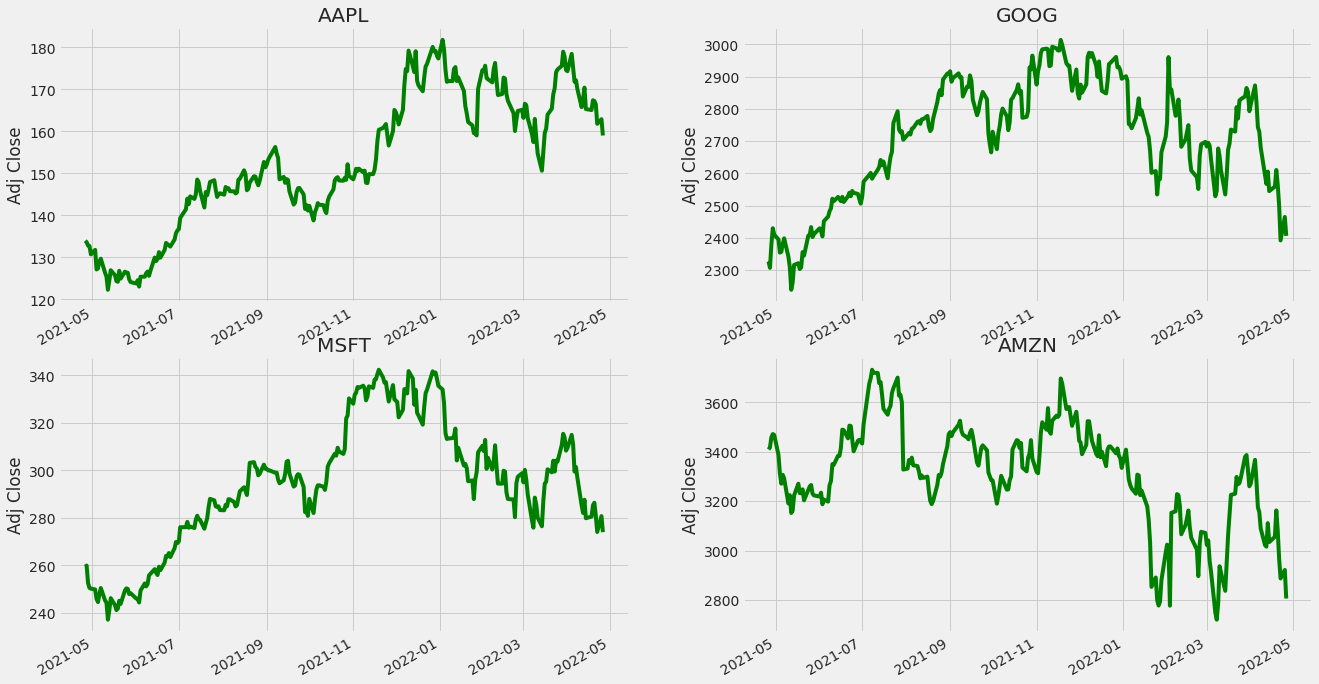

In [5]:
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot(color='g')
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 5. Daily stocks exchange

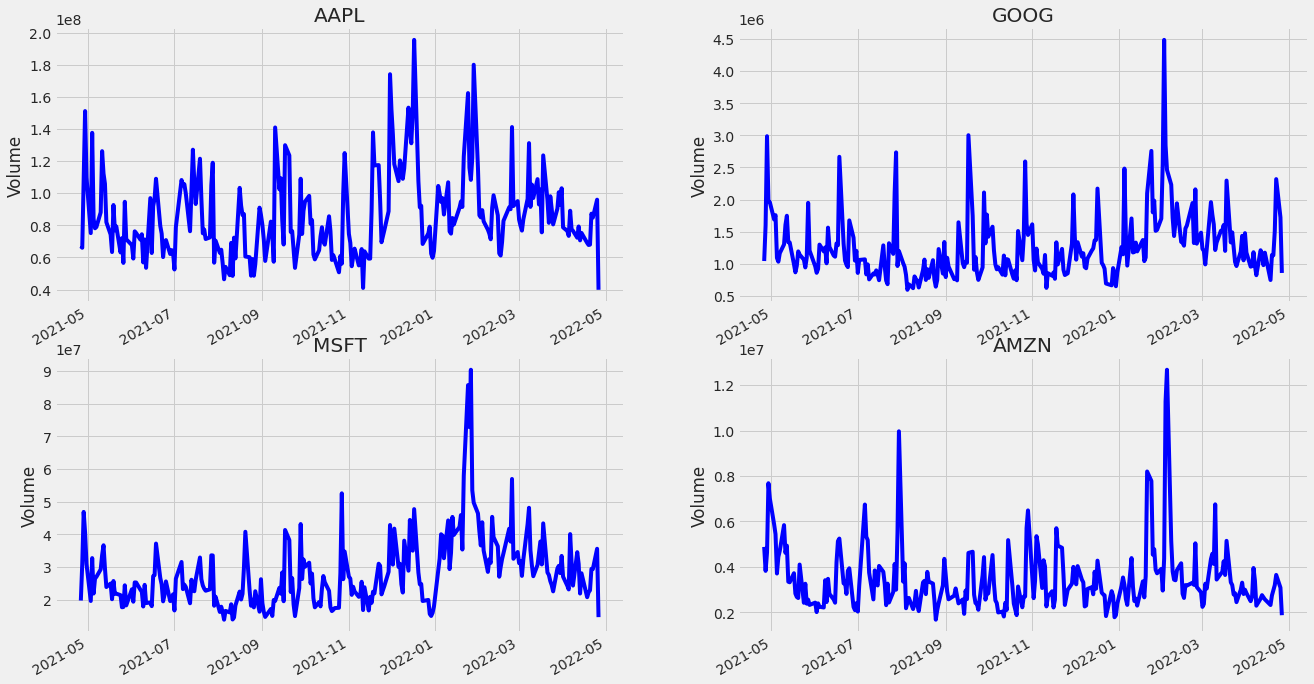

In [6]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(20, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot(color='b')
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## 6. Moving Average of different stocks

Moving averages are usually calculated to identify the trend direction of a stock or to determine its support and resistance levels. So it repersents a best time for buying and selling based on crossover of moving average 20 and 50, it means if it cross below the resistance level then its time to buy

In [7]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

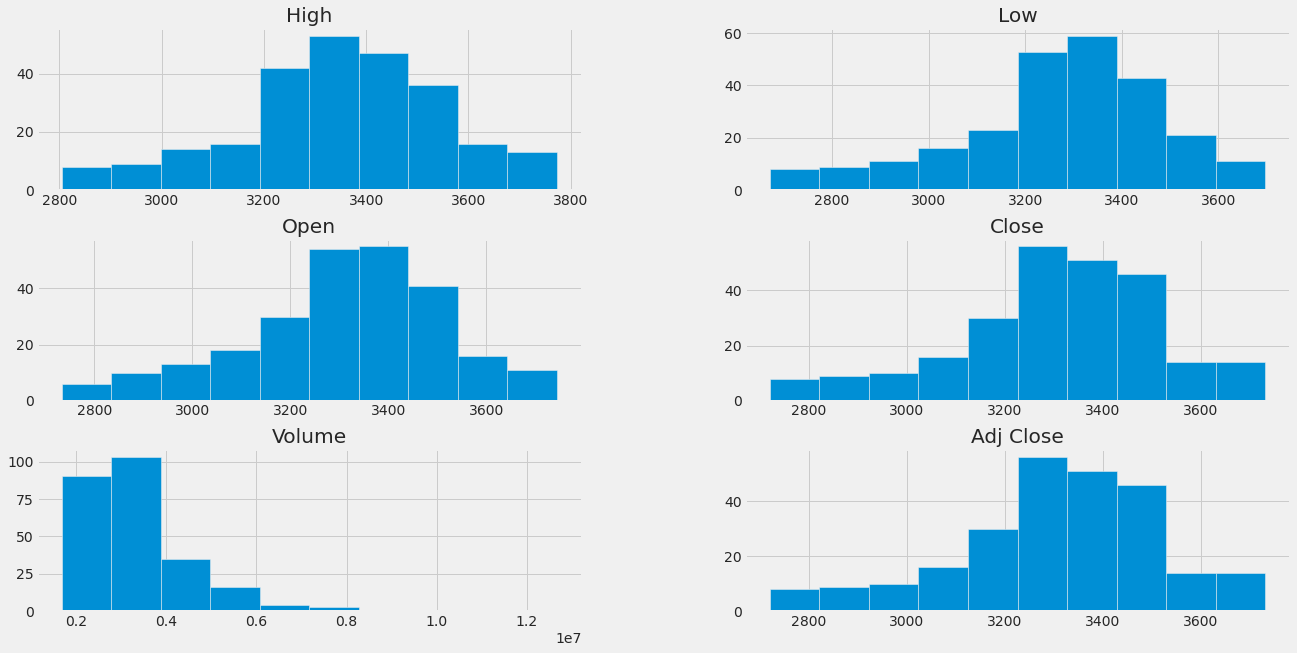

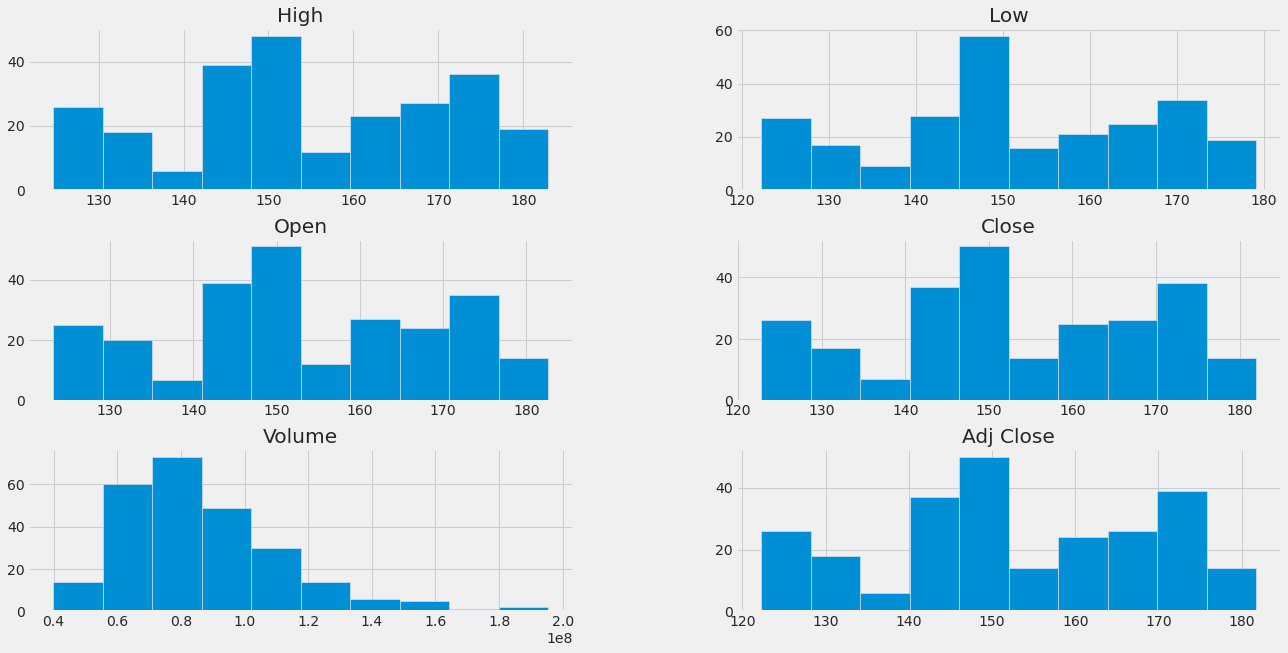

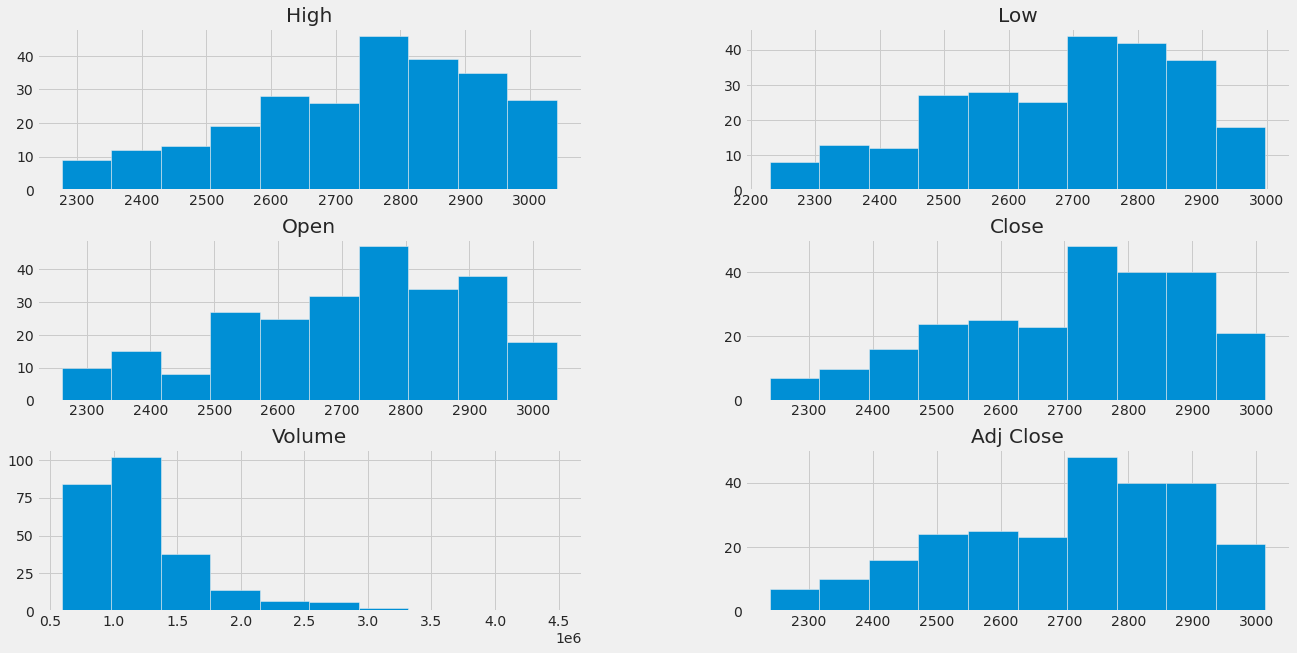

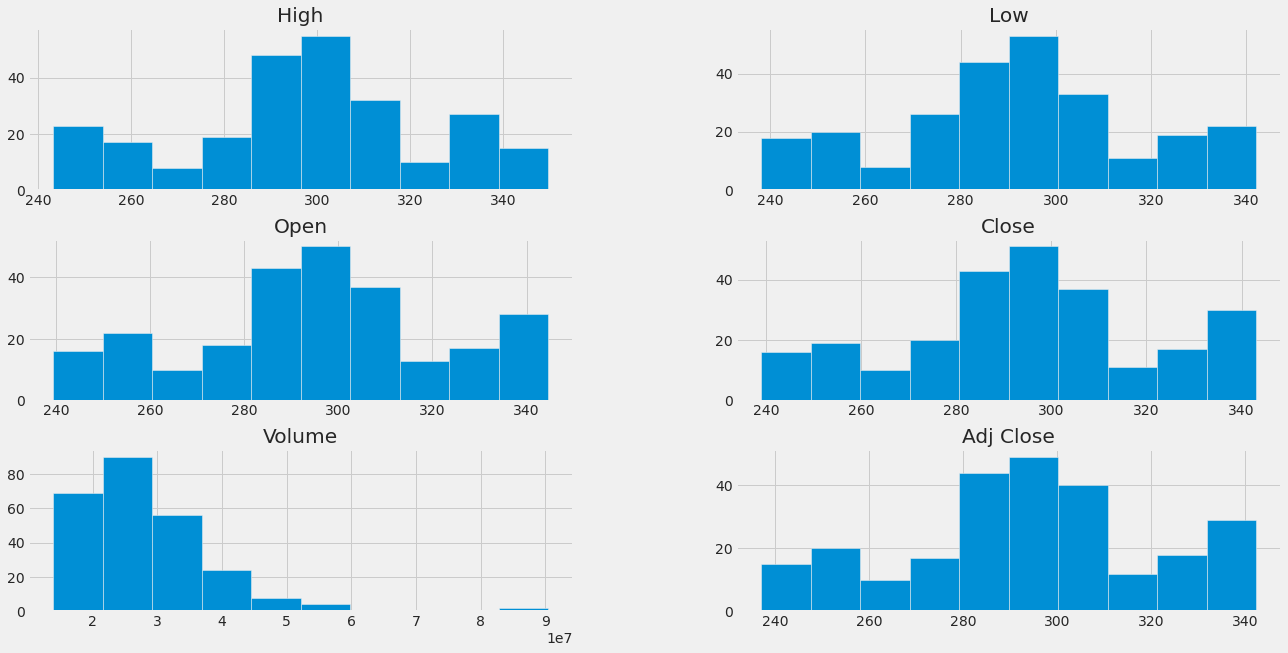

In [8]:
df.groupby("company_name").hist(figsize=(20, 10));

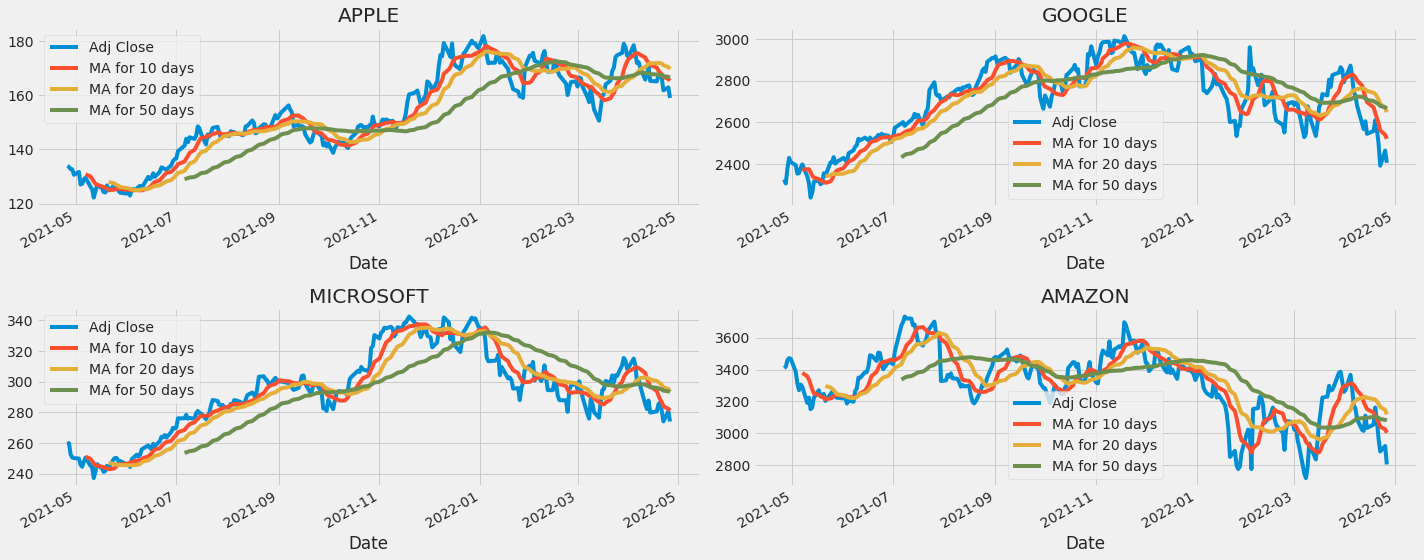

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## 7. Daily average return of stocks

The daily return measures the dollar change in a stock's price as a percentage of the previous day's closing price. 

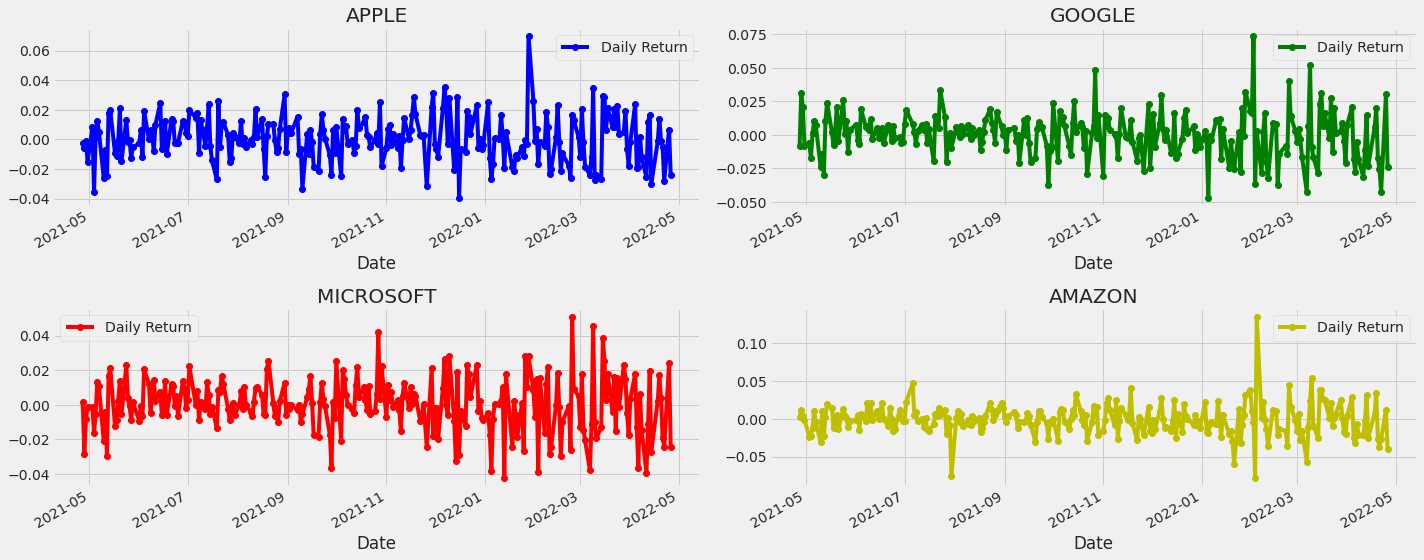

In [10]:
# Finding the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Plotting the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(20)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True,  marker='o',color='b')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True,  marker='o',color='g')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, marker='o',color='r')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True,  marker='o',color='y')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

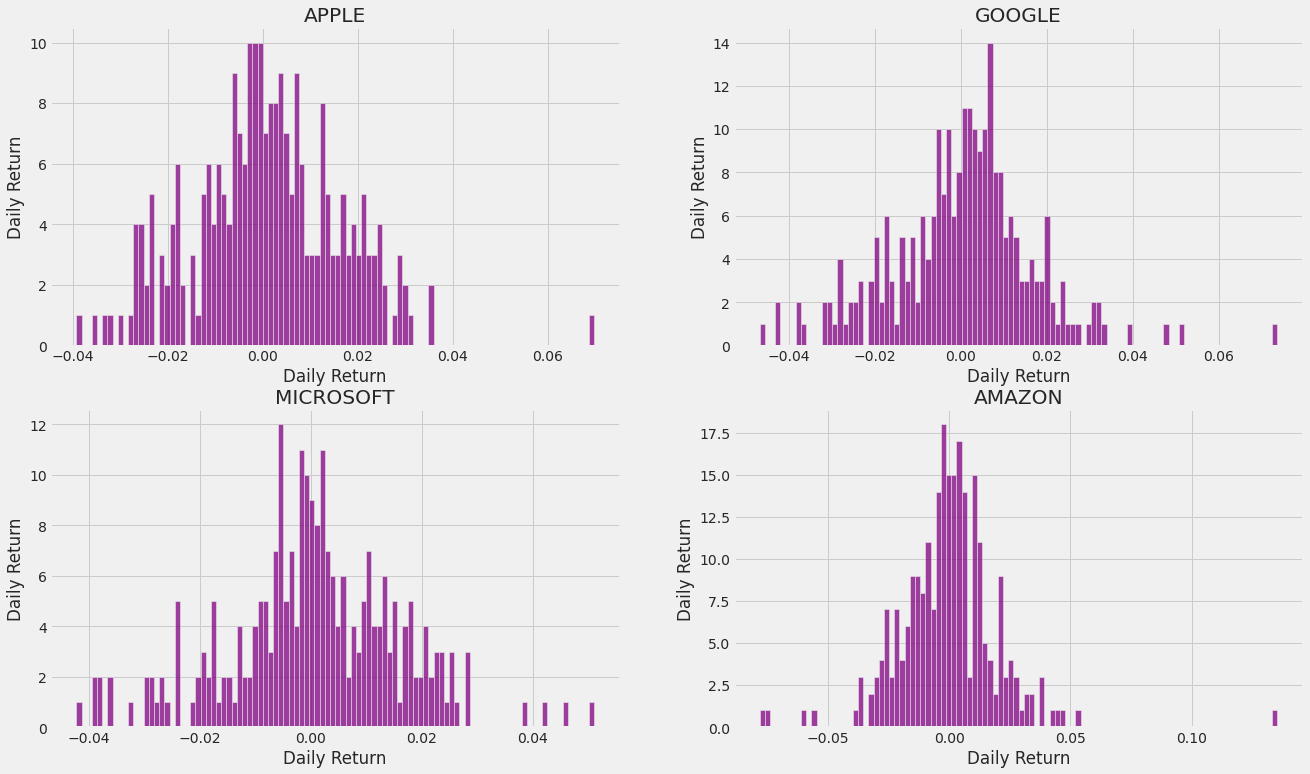

In [11]:
plt.figure(figsize=(20, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.histplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

## 8. Finding the correlation between stocks

Correlation plays a very important role in terms of avoiding huge losses in terms of short period of time

In [12]:
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']
closing_df.head() 

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-26,133.924042,2326.739990,259.436768,3409.000000
2021-04-27,133.595963,2307.120117,259.853394,3417.429932
2021-04-28,132.790756,2379.909912,252.503250,3458.500000
2021-04-29,132.691345,2429.889893,250.469803,3471.310059
2021-04-30,130.683289,2410.120117,250.142487,3467.419922


In [13]:
tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-04-26,NaN,NaN,NaN,NaN
2021-04-27,-0.002450,-0.008432,0.001606,0.002473
2021-04-28,-0.006027,0.031550,-0.028286,0.012018
2021-04-29,-0.000749,0.021001,-0.008053,0.003704
2021-04-30,-0.015133,-0.008136,-0.001307,-0.001121


Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

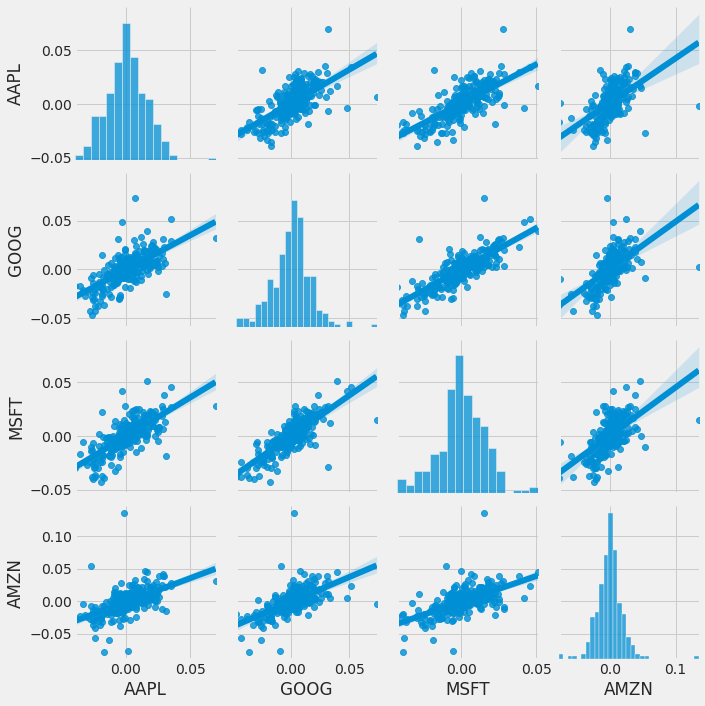

In [14]:
sns.pairplot(tech_rets, kind='reg')

Now, we are going to compare each stock its return on risk factor and cluster them together with other stock

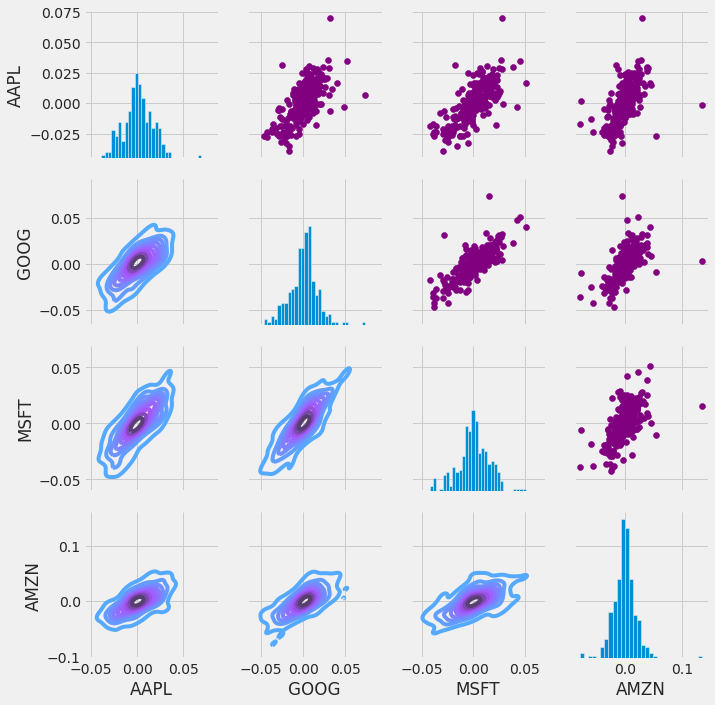

In [15]:
# Set up our figures
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color='purple')
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist, bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

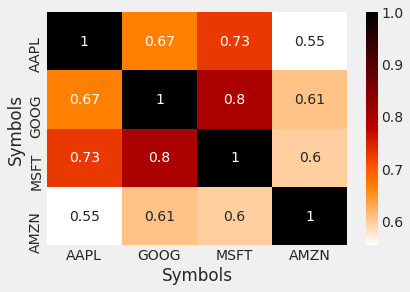

In [16]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='gist_heat_r')

We can clearly see that Apple and microsoft are higly correlated so its good to do pair trading rather than trading separtely and wasting resource

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

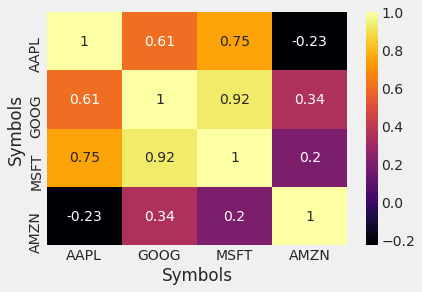

In [17]:
sns.heatmap(closing_df.corr(), annot=True, cmap='inferno')

## 9. Risk on a particular stock

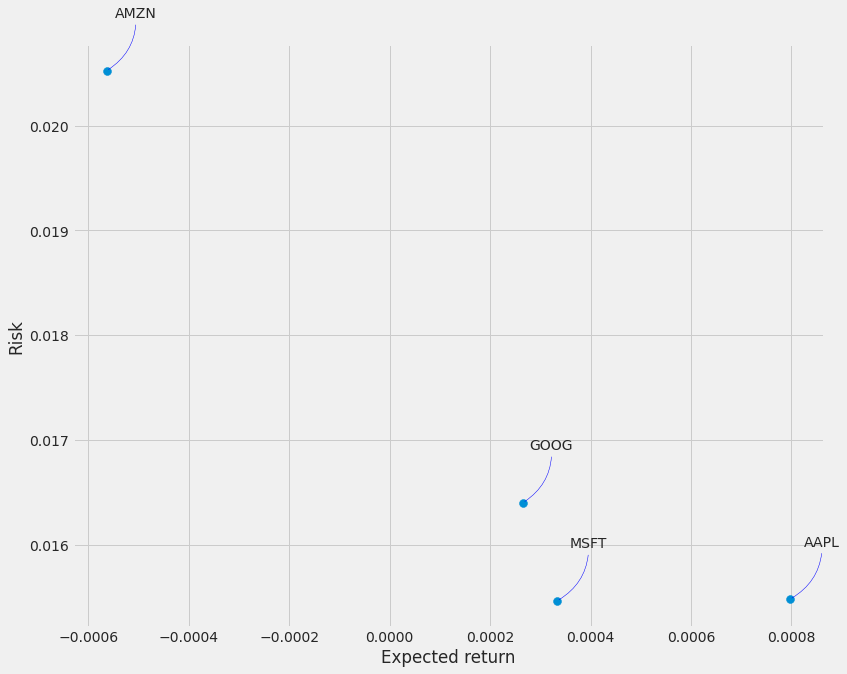

In [18]:
rets = tech_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

We can clearly see that *Apple* is one the secured the investment in termns of higher return and low risk 